In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


Question 1.

1.

In [8]:
df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Data Science Eugene Pinsky/Homework_5/bank_notes/data_banknote_authentication.csv")
#creating additional column using list comprehension: labelling 0 as green and 1 as red.
df["color"] = ["green" if x == 0 else "red" for x in df["class"] ]
df.head()

<IPython.core.display.Javascript object>

,variance,skewness,curtosis,entropy,class,color
0,3.62160,8.6661,-2.8073,-0.44699,0,green
1,4.54590,8.1674,-2.4586,-1.46210,0,green
2,3.86600,-2.6383,1.9242,0.10645,0,green
3,3.45660,9.5228,-4.0112,-3.59440,0,green
4,0.32924,-4.4552,4.5718,-0.98880,0,green


2.

In [3]:
#storing data for class 0 in df_0
df_0 = df[df["class"]==0]

#storing data for class 1 in df_1
df_1 = df[df["class"] == 1]

#creating dictionaries that store mean and standard deviation(std) for different partitions of dataset

#stores mean of all feature labels for class 0
df_0_mean = {"variance":0,"skewness":0,"curtosis":0,"entropy":0} 
#stores standard deviation of all feature labels for class 0
df_0_std  = {"variance":0,"skewness":0,"curtosis":0,"entropy":0}

#stores mean of all feature labels for class 1
df_1_mean = {"variance":0,"skewness":0,"curtosis":0,"entropy":0}
#stores standard deviation of all feature labels for class 1
df_1_std  = {"variance":0,"skewness":0,"curtosis":0,"entropy":0}

#stores mean of all feature labels for whole dataset
df_mean = {"variance":0,"skewness":0,"curtosis":0,"entropy":0}
#stores standard deviation of all feature labels for whole dataset
df_std = {"variance":0,"skewness":0,"curtosis":0,"entropy":0}

for i in df_0_mean:
    
    #calculating mean for both class and each attribute
    df_0_mean[i] = round(df_0[i].mean(),2)
    df_1_mean[i] = round(df_1[i].mean(),2)

    #calculating mean for whole data irrespective of class
    df_mean[i] = round(df[i].mean(),2)    

    #calculating standard deviation for both class and each attribute
    df_0_std[i] = round(df_0[i].std(),2)
    df_1_std[i] = round(df_1[i].std(),2)

    #calculating standard deviation for whole data irrespective of class
    df_std[i] = round(df[i].std(),2) 

#creating a dataframe df_q2 that will display results for Question 1. 2 in tabular form
data = {"Class":["0","1","all"],"Variance mean":[df_0_mean["variance"],df_1_mean["variance"],df_mean["variance"]],"Variance std":[df_0_std["variance"],df_1_std["variance"],df_std["variance"]],"Skewness mean":[df_0_mean["skewness"],df_1_mean["skewness"],df_mean["skewness"]],"Skewness std":[df_0_std["skewness"],df_1_std["skewness"],df_std["skewness"]],"Curtosis mean":[df_0_mean["curtosis"],df_1_mean["curtosis"],df_mean["curtosis"]],"Curtosis std":[df_0_std["curtosis"],df_1_std["curtosis"],df_std["curtosis"]],"Entropy mean":[df_0_mean["entropy"],df_1_mean["entropy"],df_mean["entropy"]],"Entropy std":[df_0_std["entropy"],df_1_std["entropy"],df_std["entropy"]]}
df_q2 = pd.DataFrame(data)
df_q2


<IPython.core.display.Javascript object>

,Class,Variance mean,Variance std,Skewness mean,Skewness std,Curtosis mean,Curtosis std,Entropy mean,Entropy std
0,0,2.28,2.02,4.26,5.14,0.80,3.24,-1.15,2.13
1,1,-1.87,1.88,-0.99,5.40,2.15,5.26,-1.25,2.07
2,all,0.43,2.84,1.92,5.87,1.40,4.31,-1.19,2.10


3.

I do not see any obvious patterns in the table. However i have made the following observation:
The variance mean and skewness mean for class 1 or fake notes is negative, whereas for class 0 or true notes is positive.

Question 2.

In [19]:
df = pd.read_csv("/Volumes/GoogleDrive/My Drive/Data Science Eugene Pinsky/Homework_5/bank_notes/data_banknote_authentication.csv")
df["color"] = ["green" if x == 0 else "red" for x in df["class"] ]

<IPython.core.display.Javascript object>

1.

In [20]:
#splitting dataset into a 50:50 split using train_test_split method
X_train, X_test = train_test_split(df, train_size=0.5)
X_train = X_train.reset_index(drop=True)

#dataframes that store values from X_train seperately for each class 0 and 1.
X_train_0 = X_train[X_train["color"] == "green" ]
X_train_1 = X_train[X_train["color"] == "red" ]

<IPython.core.display.Javascript object>

pairplot for class 0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

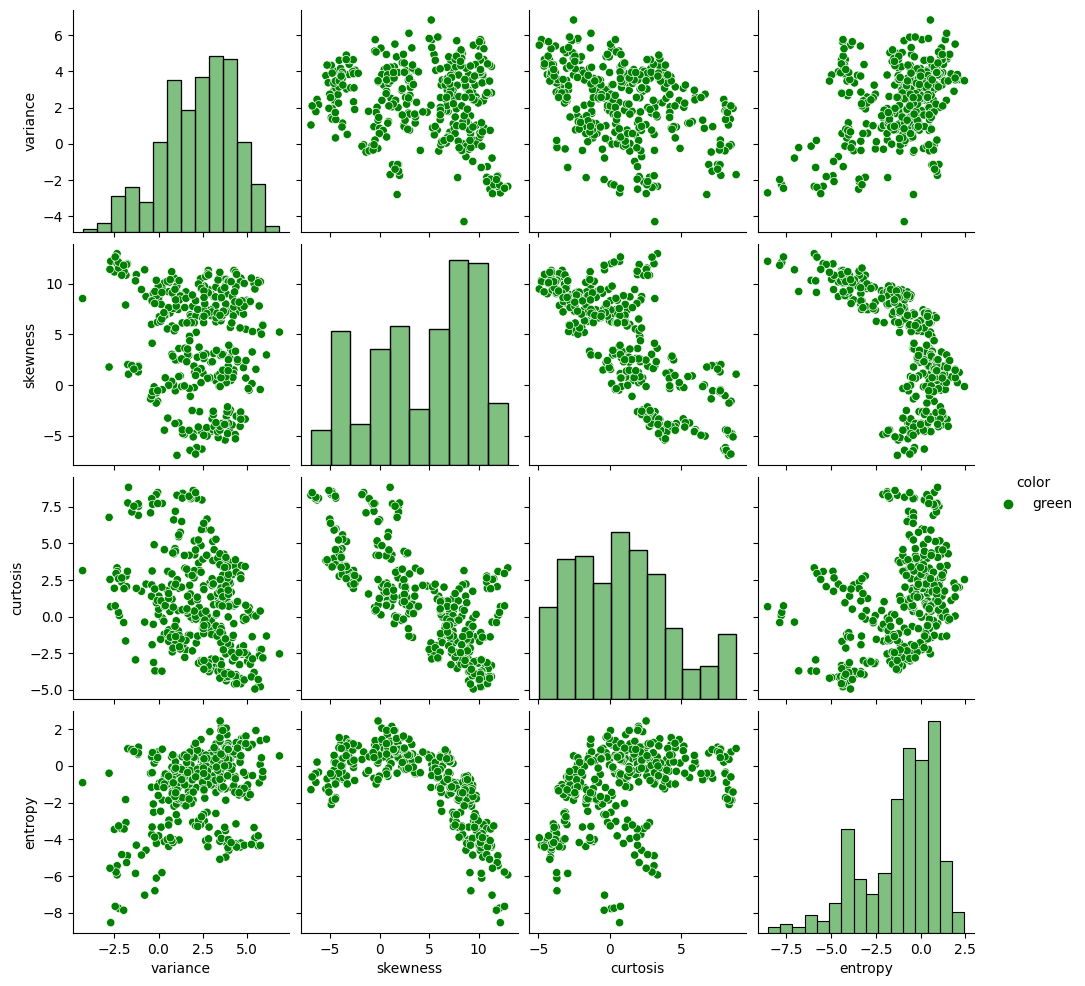

In [25]:
sns.pairplot(X_train_0,vars=["variance","skewness","curtosis","entropy"],hue="color",palette=["g"],diag_kind="hist")
plt.savefig("good_bills.pdf")
plt.show()

pairplot for class 1.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

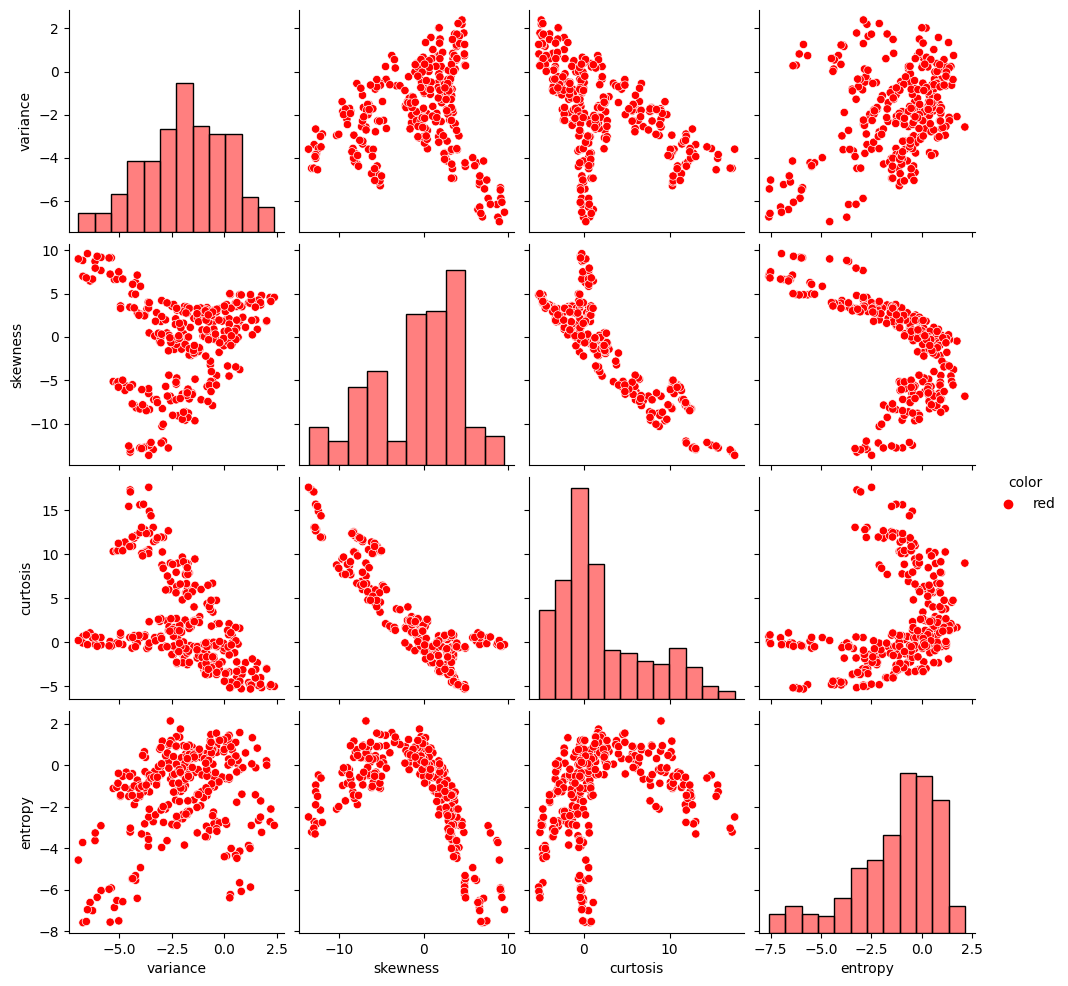

In [26]:
sns.pairplot(X_train_1,vars=["variance","skewness","curtosis","entropy"],hue="color",palette=["r"],diag_kind="hist")
plt.savefig("fake_bills.pdf")
plt.show()

2. From my observation of the pair plots i have come up with the rules below.

    A note is fake or red if it follows the following conditions:
    1. Variance is less than 0.
    2. Entropy is less than 0.
    3. Curtosis is greter than 5. 
    
    else it is a good note or green.


3.

In [37]:
#resetting index of test part.
X_test = X_test.reset_index(drop=True)

#creating a new temporary column in X_test to store labels predicted by my simple classifier.
X_test["pred"] = " "

#simple classifier code
#iterating through the dataframe
for ind in X_test.index:

    if (X_test["variance"][ind] < 0) and (X_test["entropy"][ind] < 0) and (X_test["curtosis"][ind] > 5) :
        X_test["pred"][ind] = "red"
    else:
        X_test["pred"][ind] = "green"

#storing predicted and true labels in arrays pred_labels and true_labels respectively.
pred_labels = np.asarray(X_test["pred"])
true_labels = np.asarray(X_test["color"])


4.

In [38]:

Accuracy = accuracy_score(true_labels,pred_labels)

TN,FP,FN,TP = confusion_matrix(true_labels,pred_labels).ravel()

# e) computing true positive rate
TPR = TP/(TP+FN)

# f) computing true negative rate
TNR = TN/(TN+FP)

5.

In [45]:
# Displaying data in tabular form using pandas dataframe
q2_table = pd.DataFrame(columns = ["TP","FP","TN","FN","Accuracy","TPR","TNR"])
q2_table.loc[0] = [TP,FP,TN,FN,round(Accuracy*100,2),round(TPR*100,2),round(TNR*100,2)]
q2_table.head(1)

,TP,FP,TN,FN,Accuracy,TPR,TNR
0,55.0,5.0,377.0,249.0,62.97,18.09,98.69


6. My simple classifier performs better on identifying fake notes over real notes, with a true negative rate of 98.69%. The Accuracy for my classifier is 62.97% which is higher than a 50% chance.